In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

URL='https://vnexpress.net'

In [2]:
def get_links(url):
  links=[]
  html=urlopen(url).read()
  soup=BeautifulSoup(html,'html.parser')

  urls=set(re.findall(r'(?:http|https|ftp):\/\/(?:[\w_-]+(?:(?:\.[\w_-]+)+))(?:[\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])',str(soup)))

  for url in urls:
    if url != URL and url.startswith(URL) and not url.startswith(URL + '/tac-gia') and url.endswith('.html'):
      links.append(url)
  return links

In [3]:
get_links(URL)

['https://vnexpress.net/con-truong-vu-11-anh-em-kien-chia-dat-yeu-cau-so-do-dung-ten-minh-4746936.html',
 'https://vnexpress.net/nhut-nhat-truoc-nguoi-la-4747079.html',
 'https://vnexpress.net/toan-canh-vu-thu-tuong-slovakia-bi-ban-4746667.html',
 'https://vnexpress.net/oto-cho-doan-can-bo-so-tu-phap-khanh-hoa-gap-nan-4746946.html',
 'https://vnexpress.net/nga-trung-ra-tuyen-bo-chung-ung-ho-giai-quyet-xung-dot-ukraine-bang-doi-thoai-4747000.html',
 'https://vnexpress.net/ong-le-thanh-hai-bi-cach-tat-ca-chuc-vu-trong-dang-4746728.html',
 'https://vnexpress.net/su-thich-minh-tue-khong-phai-tu-si-4747048.html',
 'https://vnexpress.net/trung-uong-gioi-thieu-nhan-su-de-bau-chu-tich-nuoc-chu-tich-quoc-hoi-4746984.html',
 'https://vnexpress.net/gia-xang-moi-nhat-hom-nay-16-5-4746869.html',
 'https://vnexpress.net/bau-bo-sung-4-uy-vien-bo-chinh-tri-khoa-13-4746941.html',
 'https://vnexpress.net/vks-de-nghi-khong-giam-an-cho-cuu-bo-truong-nguyen-thanh-long-4746883.html',
 'https://vnexpress.net

In [4]:
get_links(URL)
categories=['khoa-hoc','giai-tri','the-thao']

article_url={}

for category in categories:
  article_url[category]=[]

  for i in range(1,11):
    url='{}/{}-p{}'.format(URL,category,str(i))
    article_url[category]+= get_links(url)

  article_url[category]=list(set(article_url[category][:50]))
  print(category,len(article_url[category]))

  goc_nhin=['binh-luan-nhieu','covid-19','chinh-tri-chinh-sach','y-te-suc-khoe','kinh-doanh-quan-tri','giao-duc-tri-thuc','van-hoa-loi-song']
  article_url['goc-nhin']=[]

  for sub_cate in goc_nhin:
    url='{}/{}/{}'.format(URL,'goc-nhin',sub_cate)
    article_url['goc-nhin'] +=get_links(url)

article_url['goc-nhin']= list(set(article_url['goc-nhin'][:50]))
print('goc-nhin',len(article_url['goc-nhin']))


khoa-hoc 50
giai-tri 50
the-thao 50
goc-nhin 46


In [5]:
def get_content(url):
  content=''
  html=urlopen(url).read()
  soup=BeautifulSoup(html,'html.parser')

  div_content= soup.select('.page-detail .container')
  if len(div_content) > 0:
    div_content= div_content[0]

    description= div_content.find_all('p',{'class': 'description'})
    if len(description)>0:
      description=description[-1]
      text_description=description.get_text()
      location=description.find('span',{'class': 'location-stamp'})
      if location is not None:
        content=text_description[len(location.get_text()):]
      else:
        content = text_description

    detail= div_content.find('article',{'class': 'fck_detail'})
    if detail is not None:
      p_normal= detail.find_all('p',{'class':'Normal'})
      if len(p_normal) >0:
        for p in p_normal:
          p_text=p.get_text()
          if p_text !='' and not p_text.startswith('>>') and p_text[-1] in ['.','!','?']:
            content+=' ' + p.get_text()
  return re.sub(r'\n','',content)

In [6]:
get_content(article_url['khoa-hoc'][0])

'Các nhà khoa học Trung Quốc phát triển Xiaohong, chip điện toán lượng tử 504 qubit, dự kiến cho phép các nhà nghiên cứu trên khắp thế giới truy cập. Xiaohong là chip điện toán lượng tử lớn nhất do Trung Quốc chế tạo đến nay, được thiết kế để nâng cấp những hệ thống quản lý sự tương tác và hoạt động của các bit lượng tử (qubit) trong máy tính lượng tử. Các nhà khoa học hy vọng nó sẽ giúp cải tiến máy tính lượng tử để chúng có thể xử lý những tác vụ phức tạp hơn, Live Science hôm 13/5 đưa tin. Chip Xiaohong 504 qubit do Trung tâm Xuất sắc về Thông tin Lượng tử và Vật lý Lượng tử thuộc Viện Hàn lâm Khoa học Trung Quốc (CAS) phát triển. Công ty điện toán lượng tử Trung Quốc QuantumCTek, đơn vị đã nhận chip Xiaohong đầu tiên, sẽ hợp tác với Tập đoàn Lượng tử Viễn thông Trung Quốc để tích hợp con chip vào một máy tính lượng tử mới. Hệ thống này sau đó sẽ cho phép các nhà nghiên cứu trên toàn thế giới truy cập thông qua một nền tảng đám mây điện toán lượng tử của Tập đoàn Lượng tử Viễn thông

In [7]:
uppercase = (
    "AÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬ"
    "B"
    "C"
    "DĐ"
    "EÉÈẺẼẸÊẾỀỂỄỆ"
    "G"
    "H"
    "IÍÌỈĨỊ"
    "K"
    "L"
    "M"
    "NÓÒỎÕỌỐỒỔỖỘỜỚỞỠỢ"
    "OÓÒỎÕỌỐỒỔỖỘỜỚỞỠỢ"
    "ÔỐỒỔỖỘỜỚỞỠỢ"
    "ƠỚỜỞỠỢ"
    "P"
    "Q"
    "R"
    "S"
    "T"
    "UÚÙỦŨỤỨỪỬỮỰƯ"
    "V"
    "X"
    "YÝỲỶỸỴ"
    "W"
    "Z"
)


uppercase_string = ''.join(uppercase)
print(uppercase_string)

AÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬBCDĐEÉÈẺẼẸÊẾỀỂỄỆGHIÍÌỈĨỊKLMNÓÒỎÕỌỐỒỔỖỘỜỚỞỠỢOÓÒỎÕỌỐỒỔỖỘỜỚỞỠỢÔỐỒỔỖỘỜỚỞỠỢƠỚỜỞỠỢPQRSTUÚÙỦŨỤỨỪỬỮỰƯVXYÝỲỶỸỴWZ


In [8]:
import os.path
from os import path
if path.exists('data/categories') == False:
  !mkdir data
  !mkdir data/categories

In [11]:
import os
import shutil
def delete_files_in_folder(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            os.remove(os.path.join(root, file))
        for dir in dirs:
            shutil.rmtree(os.path.join(root, dir))

# Thay đổi đường dẫn của thư mục mà bạn muốn xóa các tệp
folder_path = "/content/data/categories/"
delete_files_in_folder(folder_path)
sentence=[]

uppercase='AÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬBCDĐEÉÈẺẼẸÊẾỀỂỄỆGHIÍÌỈĨỊKLMNÓÒỎÕỌỐỒỔỖỘỜỚỞỠỢOÓÒỎÕỌỐỒỔỖỘỜỚỞỠỢÔỐỒỔỖỘỜỚỞỠỢƠỚỜỞỠỢPQRSTUÚÙỦŨỤỨỪỬỮỰƯVXYÝỲỶỸỴWZ'

for category in article_url.keys():
  current_path='data/categories/' + category +'/'
  os.mkdir(current_path)

  count=0
  for i in range(len(article_url[category])):
    content=get_content(article_url[category][i])
    if content !='':
      count+=1
      f=open('{}/{}_{}.txt'.format(current_path,category,str(count)), 'w', encoding='utf-8')

      lines=re.sub(r'(?<=[.?!])(?=[\'"`]*['+ uppercase +'-])',' ',content)

      lines=re.split(r'(?<=[.?!])\s+(?=[\'"`"'']*['+ uppercase +'0-9-])',content )

      for line in lines:
        f.write(line + '\n')
        sentence.append(line)
      f.close()

  print(category,count)

sentence=list(set(sentence))
print('tổng số câu tách được:',len(sentence))

khoa-hoc 50
goc-nhin 46
giai-tri 50
the-thao 50
tổng số câu tách được: 5476


In [12]:
sentence[:10]

['Nhìn túi thuốc, tôi buồn quá.',
 'Tôi còn muốn đưa họ đi du lịch nhiều nơi.',
 'Bước đầu, nguyên nhân được cho là xảy ra sự cố động cơ điện của máy nghiền.',
 'Nhà mốt mong muốn truyền tải hình ảnh phụ nữ Việt Nam kiên cường, bản lĩnh, mang phong thái riêng.',
 'Thị trường kinh doanh các sản phẩm liên quan đến Covid-19, theo tôi đã trải qua ba giai đoạn.',
 'Người mẫu Camille Kostek khoe dáng đồng hồ cát với váy Rhea Costa, giày Black Suede Studio và trang sức Ettika.',
 'Chúng tôi tiếp tục kết hợp với bệnh viện tuyến trên điều trị thành công ca này.',
 'Tôi chạy nhờ luật sư thì luật sư nói, phải vậy đó nhưng xong thủ tục này cũng phải hai năm, lúc đó, cháu đã 18 tuổi, chẳng cần giấy tờ bảo hộ nữa.',
 'Bức xạ từ sao chủ khiến 55 Cancri e mất đi khí quyển ban đầu, tương tự những hành tinh đá khác quay quanh sao chủ ở khoảng cách quá gần.',
 'Nhưng lời tôi nói có đủ sức thuyết phục hay không phụ thuộc rất lớn vào nỗ lực sửa mình của ngành bảo hiểm.']

In [13]:
file_corpus=open('data/corpus.txt','w',encoding='utf-8')

count=0

for sent in sentence:
  sent=re.sub(r'\u200b','',sent)
  file_corpus.write(sent.strip()+'\n')
  count+=1
file_corpus.close()

print('so luong cau trong file ngu lieu:',count)

so luong cau trong file ngu lieu: 5476


In [14]:
f = open('data/corpus.txt','r',encoding='utf-8')
data = [line[:-1] for line in f.readlines()]
f.close()

print('so cau du lieu',len(data))

so cau du lieu 5476


In [15]:
data[:10]

['Nhìn túi thuốc, tôi buồn quá.',
 'Tôi còn muốn đưa họ đi du lịch nhiều nơi.',
 'Bước đầu, nguyên nhân được cho là xảy ra sự cố động cơ điện của máy nghiền.',
 'Nhà mốt mong muốn truyền tải hình ảnh phụ nữ Việt Nam kiên cường, bản lĩnh, mang phong thái riêng.',
 'Thị trường kinh doanh các sản phẩm liên quan đến Covid-19, theo tôi đã trải qua ba giai đoạn.',
 'Người mẫu Camille Kostek khoe dáng đồng hồ cát với váy Rhea Costa, giày Black Suede Studio và trang sức Ettika.',
 'Chúng tôi tiếp tục kết hợp với bệnh viện tuyến trên điều trị thành công ca này.',
 'Tôi chạy nhờ luật sư thì luật sư nói, phải vậy đó nhưng xong thủ tục này cũng phải hai năm, lúc đó, cháu đã 18 tuổi, chẳng cần giấy tờ bảo hộ nữa.',
 'Bức xạ từ sao chủ khiến 55 Cancri e mất đi khí quyển ban đầu, tương tự những hành tinh đá khác quay quanh sao chủ ở khoảng cách quá gần.',
 'Nhưng lời tôi nói có đủ sức thuyết phục hay không phụ thuộc rất lớn vào nỗ lực sửa mình của ngành bảo hiểm.']

In [135]:
vowel = list("aăâeêioôơuưyAĂÂEÊIOÔƠUƯYáàảãạắằẳẵặấầẩẫậéèẻẽẹếềểễệíìỉĩịóòỏõọốồổỗộớờởỡợúùủũụứừửữựýỳỷỹỵÁÀẢÃẠẮẰẲẴẶẤẦẨẪẬÉÈẺẼẸẾỀỂỄỆÍÌỈĨỊÓÒỎÕỌỐỒỔỖỘỚỜỞỠỢÚÙỦŨỤỨỪỬỮỰÝỲỶỸỴ")
consonants = list("bcdđghklmnpqrstvxBCDĐGHKLMNPQRSTVX")
full_letters=vowel + consonants
print(vowel)

typo = {
    'á': 'a\'',
    'à': 'a`',
    'ả': 'a?',
    'ã': 'a~',
    'ạ': 'a.',
    'ă': 'aw',
    'ắ': 'aw\'',
    'ằ': 'aw`',
    'ẳ': 'aw?',
    'ẵ': 'aw~',
    'ặ': 'aw.',
    'â': 'aa',
    'ấ': 'aa\'',
    'ầ': 'aa`',
    'ẩ': 'aa?',
    'ẫ': 'aa~',
    'ậ': 'aa.',
    'é': 'e\'',
    'è': 'e`',
    'ẻ': 'e?',
    'ẽ': 'e~',
    'ẹ': 'e.',
    'ê': 'ee',
    'ế': 'ee\'',
    'ề': 'ee`',
    'ể': 'ee?',
    'ễ': 'ee~',
    'ệ': 'ee.',
    'í': 'i\'',
    'ì': 'i`',
    'ỉ': 'i?',
    'ĩ': 'i~',
    'ị': 'i.',
    'ó': 'o\'',
    'ò': 'o`',
    'ỏ': 'o?',
    'õ': 'o~',
    'ọ': 'o.',
    'ô': 'oo',
    'ố': 'oo\'',
    'ồ': 'oo`',
    'ổ': 'oo?',
    'ỗ': 'oo~',
    'ộ': 'oo.',
    'ơ': 'ow',
    'ớ': 'ow\'',
    'ờ': 'ow`',
    'ở': 'ow?',
    'ỡ': 'ow~',
    'ợ': 'ow.',
    'ú': 'u\'',
    'ù': 'u`',
    'ủ': 'u?',
    'ũ': 'u~',
    'ụ': 'u.',
    'ư': 'uw',
    'ứ': 'uw\'',
    'ừ': 'uw`',
    'ử': 'uw?',
    'ữ': 'uw~',
    'ự': 'uw.',
    'ý': 'y\'',
    'ỳ': 'y`',
    'ỷ': 'y?',
    'ỹ': 'y~',
    'ỵ': 'y.'
}
region = {
    'á': 'ã',
    'à': 'ạ',
    'ả': 'ã',
    'ã': 'ả',
    'ạ': 'à',
    'ă': 'â',
    'ắ': 'ẳ',
    'ằ': 'ặ',
    'ẳ': 'ẵ',
    'ẵ': 'ẳ',
    'ặ': 'ằ',
    'â': 'ă',
    'ấ': 'ậ',
    'ầ': 'ẩ',
    'ẩ': 'ẫ',
    'ẫ': 'ể',
    'ậ': 'ấ',
    'é': 'ẹ',
    'è': 'ẻ',
    'ẻ': 'ẽ',
    'ẽ': 'è',
    'ẹ': 'ế',
    'ê': 'ê',
    'ế': 'ể',
    'ề': 'ệ',
    'ể': 'ế',
    'ễ': 'ề',
    'ệ': 'ễ',
    'í': 'ĩ',
    'ì': 'ị',
    'ỉ': 'ì',
    'ĩ': 'í',
    'ị': 'ỉ',
    'ó': 'ọ',
    'ò': 'ỏ',
    'ỏ': 'õ',
    'õ': 'ó',
    'ọ': 'ò',
    'ô': 'ơ',
    'ố': 'ỗ',
    'ồ': 'ộ',
    'ổ': 'ố',
    'ỗ': 'ồ',
    'ộ': 'ổ',
    'ơ': 'ô',
    'ớ': 'ợ',
    'ờ': 'ỡ',
    'ở': 'ờ',
    'ỡ': 'ớ',
    'ợ': 'ở',
    'ú': 'ụ',
    'ù': 'ủ',
    'ủ': 'ũ',
    'ũ': 'ú',
    'ụ': 'ù',
    'ư': 'ơ',
    'ứ': 'ự',
    'ừ': 'ữ',
    'ử': 'ứ',
    'ữ': 'ừ',
    'ự': 'ử',
    'ý': 'ỵ',
    'ỳ': 'ỷ',
    'ỷ': 'ỹ',
    'ỹ': 'ý',
    'ỵ': 'ỳ'
}
region2 = {
    'b': 'p',
    'c': 'k',
    'd': 'đ',
    'đ': 'd',
    'g': 'gh',
    'h': 'k',
    'k': 'c',
    'l': 'n',
    'm': 'n',
    'n': 'ng',
    'p': 'b',
    'q': 'k',
    'r': 'd',
    's': 'x',
    't': 'th',
    'v': 'f',
    'x': 's',
    'ch': 'tr',
    'gh': 'g',
    'kh': 'h',
    'ng': 'n',
    'ngh': 'ng',
    'nh': 'n',
    'ph': 'f',
    'th': 't',
    'tr': 'ch'
}
acronym = {
    'Anh':'a',
    'anh': 'a',
    'chị': 'c',
    'em': 'e',
    'tôi': 't',
    'bạn': 'bn',
    'không': 'ko',
    'được': 'dc',
    'gì': 'j',
    'biết': 'bt',
    'rồi': 'r',
    'vui': 'vv',
    'buồn': 'b',
    'và': 'vs',
    'vì': 'v',
    'như': 'n',
    'điện thoại': 'dt',
    'làm việc': 'lv',
    'sinh nhật': 'sn',
    'thế nào': 'tn',
    'bao giờ': 'bg',
    'nhất': '1',
    'yêu': 'iu',
    'không sao': 'ks',
    'gia đình': 'gd',
    'bạn bè': 'bb',
    'giúp đỡ': 'gd',
    'đi': 'đi',
    'nhà': 'nhà',
    'học': 'hc',
    'người': 'ng',
    'chưa': 'chưa',
    'chuyện': 'ch',
    'một': '1',
    'rất': 'rất',
    'với': 'vs'
}

print(acronym)
print(typo)
print(region)
print(region2)

['a', 'ă', 'â', 'e', 'ê', 'i', 'o', 'ô', 'ơ', 'u', 'ư', 'y', 'A', 'Ă', 'Â', 'E', 'Ê', 'I', 'O', 'Ô', 'Ơ', 'U', 'Ư', 'Y', 'á', 'à', 'ả', 'ã', 'ạ', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'é', 'è', 'ẻ', 'ẽ', 'ẹ', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'í', 'ì', 'ỉ', 'ĩ', 'ị', 'ó', 'ò', 'ỏ', 'õ', 'ọ', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'ú', 'ù', 'ủ', 'ũ', 'ụ', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ', 'Á', 'À', 'Ả', 'Ã', 'Ạ', 'Ắ', 'Ằ', 'Ẳ', 'Ẵ', 'Ặ', 'Ấ', 'Ầ', 'Ẩ', 'Ẫ', 'Ậ', 'É', 'È', 'Ẻ', 'Ẽ', 'Ẹ', 'Ế', 'Ề', 'Ể', 'Ễ', 'Ệ', 'Í', 'Ì', 'Ỉ', 'Ĩ', 'Ị', 'Ó', 'Ò', 'Ỏ', 'Õ', 'Ọ', 'Ố', 'Ồ', 'Ổ', 'Ỗ', 'Ộ', 'Ớ', 'Ờ', 'Ở', 'Ỡ', 'Ợ', 'Ú', 'Ù', 'Ủ', 'Ũ', 'Ụ', 'Ứ', 'Ừ', 'Ử', 'Ữ', 'Ự', 'Ý', 'Ỳ', 'Ỷ', 'Ỹ', 'Ỵ']
{'Anh': 'a', 'anh': 'a', 'chị': 'c', 'em': 'e', 'tôi': 't', 'bạn': 'bn', 'không': 'ko', 'được': 'dc', 'gì': 'j', 'biết': 'bt', 'rồi': 'r', 'vui': 'vv', 'buồn': 'b', 'và': 'vs', 'vì': 'v', 'như': 'n', 'điện thoại': 'dt', 'làm việc': 'lv', 'sinh nhật': 'sn', 'thế nào': 'tn', 'bao 

In [17]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.2 MB/s eta 0:00:00


In [18]:
import re
import numpy as np
from unidecode import unidecode

def teen_code(sentence):
  random = np.random.uniform(0,1,1)[0]
  new_sentence= str(sentence)

  if random >0.5:
    for word in acronym.keys():
      random2=np.random.uniform(0,1,1)[0]
      if random2 < 0.5:
        new_sentence=re.sub(word,acronym[word],new_sentence)
    return new_sentence
  else:
    return sentence

def add_noise(sentence):
  sentence= teen_code(sentence)
  noisy_sentence=''
  i=0
  while i < len(sentence):
    if sentence[i] not in full_letters:
      noisy_sentence += sentence[i]
    else:
      random = np.random.uniform(0,1,1)[0]
      if random <=0.94:
        noisy_sentence+= sentence[i]
      elif random <=0.985:
        if sentence[i] in typo.keys():
          if sentence[i] in region.keys():
            random2 = np.random.uniform(0,1,1)[0]
            if random2 <=0.4:
              noisy_sentence += typo[sentence[i]]
            elif random2 <0.8:
              noisy_sentence +=region[sentence[i]]
            elif random2 <0.95:
              noisy_sentence +=unidecode(sentence[i])
            else:
              noisy_sentence +=sentence[i]
          else:
            random3 = np.random.uniform(0,1,1)[0]
            if random3 <= 0.6:
              noisy_sentence += typo[sentence[i]]
            elif random3 <0.9:
              noisy_sentence +=unidecode(sentence[i])
            else:
              noisy_sentence += sentence[i]
        elif i == 0 or sentence[i-1] not in full_letters:
          random4=np.random.uniform(0,1,1)[0]
          if random4 <=0.9:
            if i < len(sentence) -1 and sentence[i] in region2.keys() and sentence[i+1] in vowel:
              noisy_sentence+= region2[sentence[i]]
            elif i < len(sentence) - 2 and sentence[i:i+2] in region2.keys() and sentence[i+2] in vowel:
              noisy_sentence += region2[sentence[i:i+2]]
              i+=1
            else:
              noisy_sentence += sentence[i]
          else:
            noisy_sentence += sentence[i]
        else:
          noisy_sentence += sentence[i]
      else:
        new_random = np.random.uniform(0,1,1)[0]
        if new_random <= 0.33 and i != len(sentence) -1:
          noisy_sentence += sentence[i+1]
          noisy_sentence += sentence[i]
          i+=1
        else:
          noisy_sentence +=sentence[i]

    i += 1

  return noisy_sentence

In [19]:
add_noise('Tôi tên là Nguyễn Anh Dũng')

'Tôi tên là Nguyễn Anh Dũng'

In [136]:
alphabet = ['\x00',' '] + list('0123456789') + full_letters
print(len(alphabet))
print(alphabet)

190
['\x00', ' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'ă', 'â', 'e', 'ê', 'i', 'o', 'ô', 'ơ', 'u', 'ư', 'y', 'A', 'Ă', 'Â', 'E', 'Ê', 'I', 'O', 'Ô', 'Ơ', 'U', 'Ư', 'Y', 'á', 'à', 'ả', 'ã', 'ạ', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'é', 'è', 'ẻ', 'ẽ', 'ẹ', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'í', 'ì', 'ỉ', 'ĩ', 'ị', 'ó', 'ò', 'ỏ', 'õ', 'ọ', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'ú', 'ù', 'ủ', 'ũ', 'ụ', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'ý', 'ỳ', 'ỷ', 'ỹ', 'ỵ', 'Á', 'À', 'Ả', 'Ã', 'Ạ', 'Ắ', 'Ằ', 'Ẳ', 'Ẵ', 'Ặ', 'Ấ', 'Ầ', 'Ẩ', 'Ẫ', 'Ậ', 'É', 'È', 'Ẻ', 'Ẽ', 'Ẹ', 'Ế', 'Ề', 'Ể', 'Ễ', 'Ệ', 'Í', 'Ì', 'Ỉ', 'Ĩ', 'Ị', 'Ó', 'Ò', 'Ỏ', 'Õ', 'Ọ', 'Ố', 'Ồ', 'Ổ', 'Ỗ', 'Ộ', 'Ớ', 'Ờ', 'Ở', 'Ỡ', 'Ợ', 'Ú', 'Ù', 'Ủ', 'Ũ', 'Ụ', 'Ứ', 'Ừ', 'Ử', 'Ữ', 'Ự', 'Ý', 'Ỳ', 'Ỷ', 'Ỹ', 'Ỵ', 'b', 'c', 'd', 'đ', 'g', 'h', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'v', 'x', 'B', 'C', 'D', 'Đ', 'G', 'H', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'X']


In [21]:
phrases= []

for text in data:
  for c in set(text):
    if re.match('\w',c) and c not in alphabet:
      uc = unidecode(c)
      if re.match('\w',uc) and uc not in alphabet:
        text = re.sub(c, '', text)
      else:
        text = re.sub(c, uc, text)
  phrases += re.findall(r'\w[\w\s]+', text)

phrases = [p.strip() for p in phrases if len(p.split()) > 1]

print(len(phrases))
phrases[-10:]

15120


['Bảo hiểm y tế đang thực hiện tốt vai trò hỗ trợ người dân trong khám chữa bệnh',
 'nhưng vì nhiều lý do mà mức hỗ trợ này chưa đủ',
 'Chúng tôi dù cố gắng chuyện trò cũng không thể thay thế các mối quan hệ của ông bà',
 'Số khác cho biết nếu công ty quyết ký hợp đồng chính thức',
 'họ sẽ nghỉ việc',
 'Trang phục mang phong cách cổ điển',
 'gồm vest và chân váy bút chì làm từ gấm trắng',
 'đính sequin và các hạt cườm nhằm tăng hiệu ứng thị giác',
 'Nghiên cứu của Mayeski cho thấy các điều kiện đang thay đổi trên khắp đỉnh Everest',
 'không chỉ riêng tại thác băng Khumbu']

In [22]:
!pip install  --upgrade nltk

In [23]:
from nltk import ngrams

NGRAM=5
MAXLEN=39

list_ngrams=[]
for p in phrases:
  list_p=p.split()
  if(len(list_p) >= NGRAM):
    for ngr in ngrams(p.split(),NGRAM):
      if len(' '.join(ngr)) <= MAXLEN:
        list_ngrams.append(' '.join(ngr))
  elif len(' '.join(list_p)) <= MAXLEN:
    list_ngrams.append(' '.join(list_p))

list_ngrams = list((list_ngrams))
print(len(list_ngrams))
list_ngrams[:10]

87196


['Nhìn túi thuốc',
 'tôi buồn quá',
 'Tôi còn muốn đưa họ',
 'còn muốn đưa họ đi',
 'muốn đưa họ đi du',
 'đưa họ đi du lịch',
 'họ đi du lịch nhiều',
 'đi du lịch nhiều nơi',
 'Bước đầu',
 'nguyên nhân được cho là']

In [24]:
def encoder_data(text):
  x=np.zeros((MAXLEN, len(alphabet)))
  for i, c in enumerate(text[:MAXLEN]):
    if c not in alphabet:
      continue
    x[i,alphabet.index(c)] = 1
  if i < MAXLEN -1:
    for j in range(i+1,MAXLEN):
      x[j,0] =1
  return x

def decoder_data(x):
  x=x.argmax(axis=-1)
  return ''.join(alphabet[i] for i in x)

In [25]:
print(encoder_data('tôi tên là Nguyễn Anh Dũng').shape)
print(decoder_data(encoder_data('tôi tên là Nguyễn Anh Dũng')))

(39, 190)
tôi tên là Nguyễn Anh Dũng             


In [1]:
from keras.models import Sequential
from keras.layers import Activation, TimeDistributed, Dense, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [27]:
encoder = LSTM(256,input_shape =(MAXLEN,len(alphabet)),return_sequences=True)

In [28]:
decoder= Bidirectional(LSTM(256,return_sequences=True,dropout=0.2))

In [41]:
model = Sequential()
model.add(encoder)
model.add(decoder)
model.add(TimeDistributed(Dense(256)))
model.add(Activation('relu'))
model.add(TimeDistributed(Dense(len(alphabet))))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 39, 256)           457728    
                                                                 
 bidirectional (Bidirection  (None, 39, 512)           1050624   
 al)                                                             
                                                                 
 time_distributed_2 (TimeDi  (None, 39, 256)           131328    
 stributed)                                                      
                                                                 
 activation_2 (Activation)   (None, 39, 256)           0         
                                                                 
 time_distributed_3 (TimeDi  (None, 39, 190)           48830     
 stributed)                                                      
                                                      

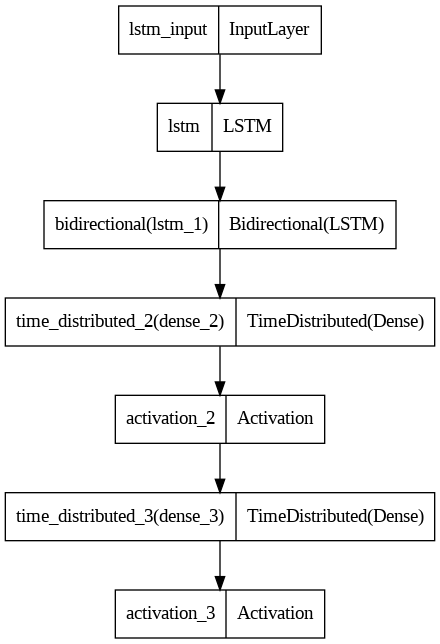

In [42]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model.png')

In [43]:
from sklearn.model_selection import train_test_split
train_data, valid_data = train_test_split(list_ngrams,test_size=0.2,random_state=42)

In [44]:
BATCH_SIZE = 512
EPOCHS =10

def generate_data(data,batch_size):
  current_index = 0
  while True:
    x,y=[],[]
    for i in range(batch_size):
      y.append(encoder_data(data[current_index]))
      x.append(encoder_data(add_noise(data[current_index])))
      current_index +=1
      if current_index > len(data) -1:
        current_index =0
    yield(np.array(x),np.array(y))

In [45]:
train_generator = generate_data(train_data,batch_size=BATCH_SIZE)
validation_generator = generate_data(valid_data,batch_size=BATCH_SIZE)

In [46]:
len(train_data)//BATCH_SIZE

136

In [47]:
H=model.fit(train_generator,epochs=EPOCHS,steps_per_epoch = len(train_data)//BATCH_SIZE,validation_data=validation_generator,validation_steps=len(valid_data)//BATCH_SIZE)


Epoch 1/10
136/136 [==============================] - 49s 315ms/step - loss: 0.8154 - accuracy: 0.8364 - val_loss: 0.2685 - val_accuracy: 0.9381
Epoch 2/10
136/136 [==============================] - 56s 414ms/step - loss: 0.2430 - accuracy: 0.9418 - val_loss: 0.2167 - val_accuracy: 0.9473
Epoch 3/10
136/136 [==============================] - 46s 337ms/step - loss: 0.2062 - accuracy: 0.9475 - val_loss: 0.1853 - val_accuracy: 0.9500
Epoch 4/10
136/136 [==============================] - 52s 383ms/step - loss: 0.1856 - accuracy: 0.9515 - val_loss: 0.1669 - val_accuracy: 0.9557
Epoch 5/10
136/136 [==============================] - 55s 405ms/step - loss: 0.1665 - accuracy: 0.9558 - val_loss: 0.1533 - val_accuracy: 0.9592
Epoch 6/10
136/136 [==============================] - 52s 383ms/step - loss: 0.1517 - accuracy: 0.9598 - val_loss: 0.1384 - val_accuracy: 0.9632
Epoch 7/10
136/136 [==============================] - 53s 389ms/step - loss: 0.1403 - accuracy: 0.9622 - val_loss: 0.1304 - val_ac

In [48]:
model.save('model_{0:.4f}.h5'.format(H.history['val_accuracy'][-1]))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


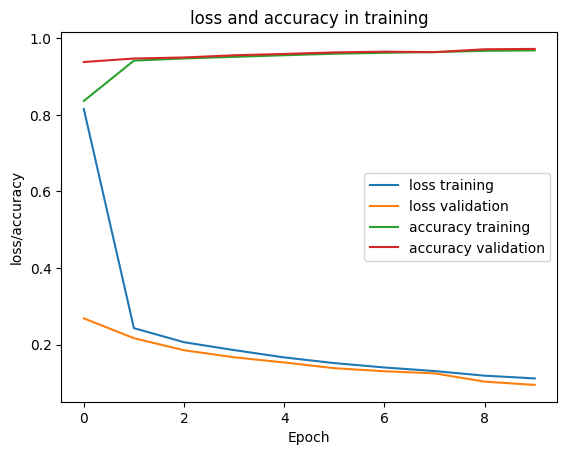

In [49]:
import matplotlib.pyplot as plt

# plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0,EPOCHS),H.history['loss'],label='loss training')
plt.plot(np.arange(0,EPOCHS),H.history['val_loss'],label='loss validation')
plt.plot(np.arange(0,EPOCHS),H.history['accuracy'],label='accuracy training')
plt.plot(np.arange(0,EPOCHS),H.history['val_accuracy'],label='accuracy validation')
plt.title('loss and accuracy in training')
plt.xlabel('Epoch')
plt.ylabel('loss/accuracy')
plt.legend()
plt.show()

In [118]:
from collections import Counter
from keras.models import load_model
import nltk
import numpy as np
import re

model =load_model('model_{0:.4f}.h5'.format(H.history['val_accuracy'][-1]))

NGRAM=5
MAXLEN=39


In [138]:
print(len(alphabet))


190


In [145]:
def encoder_data(text):
  x=np.zeros((MAXLEN,len(alphabet)))
  for i,c in enumerate(text[:MAXLEN]):
    if c not in alphabet:
      continue
    x[i,alphabet.index(c)] =1
  if i < MAXLEN -1:
    for j in range(i+1,MAXLEN):
      x[j,0] =1
  return x
def decoder_data(x):
  x=x.argmax(axis=-1)
  return ''.join(alphabet[i] for i in x)

In [146]:
print(encoder_data('Tôi là ai tên gì').shape)
print(decoder_data(encoder_data('Tôi là ai tên gì')))

(39, 190)
Tôi là ai tên gì                       


In [147]:
def nltk_ngrams(sentence,n,maxlen):
  list_ngrams=[]
  list_words=sentence.split()
  num_words=len(list_words)

  if (num_words >=n):
    for ngram in nltk.ngrams(list_words,n):
      if len(' '.join(ngram)) <= maxlen:
        list_ngrams.append(ngram)
  else:
    list_ngrams.append(tuple(list_words))

  return list_ngrams

In [148]:
nltk_ngrams('xuwr ný ngoon ngữ tuwj nhêin',NGRAM,MAXLEN)

[('xuwr', 'ný', 'ngoon', 'ngữ', 'tuwj'),
 ('ný', 'ngoon', 'ngữ', 'tuwj', 'nhêin')]

In [149]:
def guess(ngram):
  text= ' '.join(ngram)
  preds = model.predict(np.array([encoder_data(text)]))
  return decoder_data(preds[0]).strip('\x00')

In [150]:
guess(('xuwr','ný','ngoon','ngữ','tuwj'))

1/1 [==============================] - 0s 20ms/step


'xuu ný ngonn gg ttử'

In [151]:
def add_punctuation(text,corrected_text):
  list_punctuation ={}
  for (i,word) in enumerate(text.split()):
    if word[0] not in alphabet or word[-1] not in alphabet:
      start_punc = ''
      for c in word:
        if c in alphabet:
          break
        start_punc += c

      end_punc=''
      for c in word[::-1]:
        if c in alphabet:
          break
        end_punc +=c
      end_punc = end_punc[::-1]

      list_punctuation[i]=[start_punc,end_punc]

  result=''
  for (i,word) in enumerate(corrected_text.split()):
    if i in list_punctuation:
      result += (list_punctuation[i][0] + word + list_punctuation[i][1]) + ' '
    else:
      result+= word + ' '

  return result.strip()


In [152]:
def correct(text):
  new_text = re.sub(r'[^' + ''.join(alphabet)+']','',text)

  ngrams = list(nltk_ngrams(new_text,NGRAM,MAXLEN))
  guessed_ngrams= list(guess(ngram) for ngram in ngrams)
  candidates= [Counter() for _ in range(len(guessed_ngrams)+ NGRAM -1)]

  for nid, ngram in (enumerate(guessed_ngrams)):
    for wid, word in (enumerate(re.split('\s',ngram))):
      candidates[nid + wid].update([word])

  corrected_text = ' '.join(c.most_common(1)[0][0] for c in candidates if c)
  return add_punctuation(text,corrected_text)

In [153]:
text="Hôm qua, tôi và bạn bè đã đi chời ở công viên. Chúng tôi đã có một ngày rât vui vẻ và thich thú. Chúng tôi chơi các trò chơi như đu quay, xe điện đụng và nhà bóng"

In [154]:
correct(text)

1/1 [==============================] - 0s 21ms/step


'Hôm qua, tôi và bạn bè đã đi crời ở công viên. Chúng tôi đã có một ngày rât vui vẻ và thcch CCúng. Chúng tôi chơi các trò chơi như đu quay, xe điện dụng và nhà bóng'

In [158]:
text=input()

result = correct(text)
print(result)

text = re.sub(r'[^' + ''.join(alphabet) +']','',text)
list_text=text.split()

result= re.sub(r'[^' + ''.join(alphabet) +']','',result)
list_result=result.split()

corrected_word = [(list_text[i],list_result[i]) for i in range(len(list_text)) if list_text[i] != list_result[i]]
corrected_word

a tên gì
1/1 [==============================] - 0s 20ms/step
ant tên  ì


[('a', 'ant'), ('gì', '\x00ì')]